# Support vector machine (Máquina de vectores de soporte)
Katlyn Mackness <br>
11/12/2024 - Updated  24/02/2025

## Objetivo
Analizar los datos para encontrar factores que puedan estar asociados con que los empleados abandonen la empresa.

In [ ]:
# Importar librerias
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt

from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings 
warnings.filterwarnings('ignore')

# Cargar archivo
data = pd.read_csv("Data/recursos_humanos.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Descripción de los Variables
* satisfaction_level: Nivel de satisfacción. 
* last_evaluation: Puntaje obtenido en la ultima evaluación. 
* average_montly_hours: Promedio de horas trabajadas al mes. 
* time_spend_company: Tiempo del usuario en la compañía. 
* work_accident: Si el empleado ha tenido algún accidente laboral (1 = Sí, 0 = No). 
* promotion_last_5years: Si el empleado ha sido promovido en los últimos 5 años. 
* sales: Departamento donde trabaja. 
* salary: Categoría del salario. 
* left: Variable a predecir y si el empleado dejó o no la empresa (1 = Sí, 0 = No).

In [2]:
# Recodificar las columnas categóricas
df_encoded = pd.get_dummies(data, columns=['sales', 'salary'], dtype=int)
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## SVM Modelo predictivo
Use el método de Máquinas de soporte vectorial para generar un modelo predictivo. 
* Pruebe 4 diferentes tipos de Kernel para encontrar el mejor
* En cada caso elabore:
    * Un mapa de calor para las matrices de confusión
    * Un reporte de clasificación detallado.

In [3]:
# Creación de grupos de entrenamiento y prueba

df_encoded["left"] = df_encoded["left"].astype('int')
y = np.asarray(df_encoded["left"])
X = np.asarray(df_encoded.drop('left', axis=1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Grupo de entrenamiento:", X_train.shape, y_train.shape)
print("Grupo de prueba:", X_test.shape, y_test.shape)

Grupo de entrenamiento: (11999, 20) (11999,)
Grupo de prueba: (3000, 20) (3000,)


In [4]:
# Normalización 
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Prueba de SVM con Kernel RBF

In [5]:
model_rbf = svm.SVC(kernel="rbf")
model_rbf.fit(X_train, y_train)

SVC()

In [6]:
yhat = model_rbf.predict(X_test)

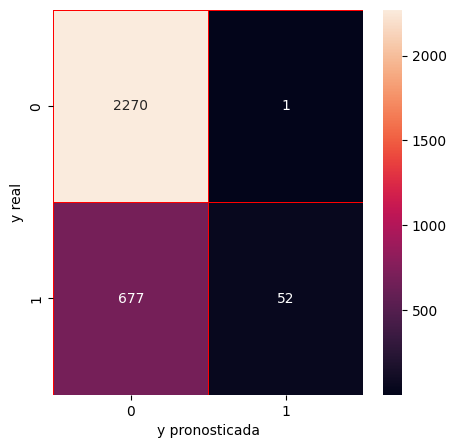

array([[2270,    1],
       [ 677,   52]])

In [7]:
# Mapa de calor
y_pred = model_rbf.predict(X)
cm_rbf = confusion_matrix(y_test, yhat)

f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm_rbf, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y pronosticada")
plt.ylabel("y real")
plt.show()
cm_rbf

In [8]:
# Reporte de clasificación
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2271
           1       0.98      0.07      0.13       729

    accuracy                           0.77      3000
   macro avg       0.88      0.54      0.50      3000
weighted avg       0.82      0.77      0.69      3000



### Prueba de SVM con Kernel Lineal

In [9]:
model_linear = svm.SVC(kernel="linear")
model_linear.fit(X_train, y_train)

yhat = model_linear.predict(X_test)

y_pred = model_linear.predict(X)
cm = confusion_matrix(y_test, yhat)
cm

array([[2127,  144],
       [ 552,  177]])

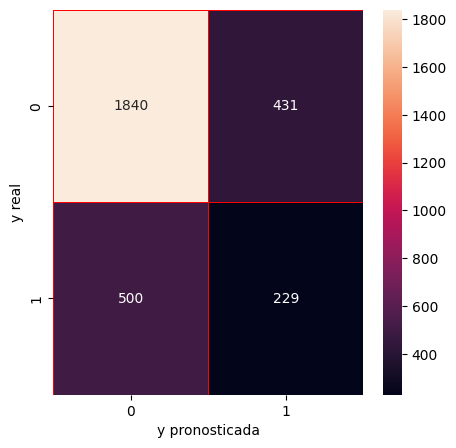

In [19]:
# Mapa de calor
f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y pronosticada")
plt.ylabel("y real")
plt.show()

In [11]:
# Reporte de clasificación
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2271
           1       0.55      0.24      0.34       729

    accuracy                           0.77      3000
   macro avg       0.67      0.59      0.60      3000
weighted avg       0.74      0.77      0.73      3000



### Prueba de SVM con Kernel Polinomial

In [12]:
clf = svm.SVC(kernel="poly")
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

y_pred = clf.predict(X)
cm = confusion_matrix(y_test, yhat)
cm

array([[2271,    0],
       [ 729,    0]])

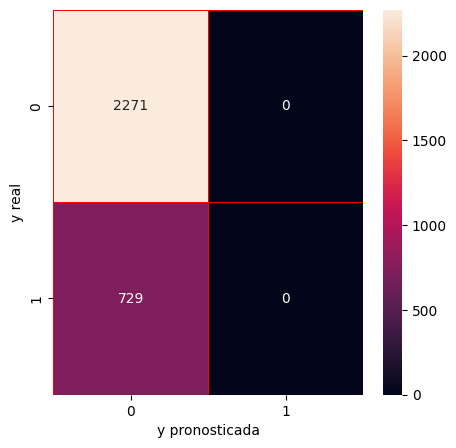

In [13]:
# Mapa de calor
f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y pronosticada")
plt.ylabel("y real")
plt.show()

In [14]:
# Reporte de clasificación
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2271
           1       0.00      0.00      0.00       729

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.57      0.76      0.65      3000



### Prueba de SVM con Kernel Sigmoide

In [15]:
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

y_pred = clf.predict(X)
cm = confusion_matrix(y_test, yhat)
cm

array([[1840,  431],
       [ 500,  229]])

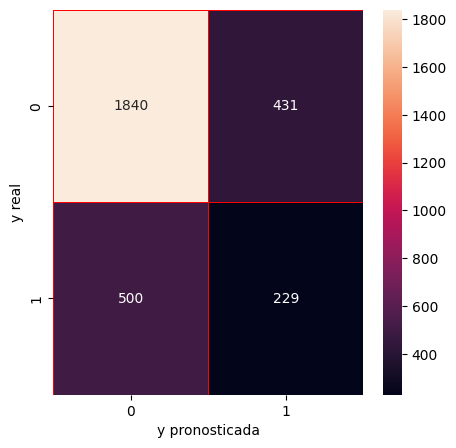

In [16]:
# Mapa de calor
f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y pronosticada")
plt.ylabel("y real")
plt.show()

In [17]:
# Reporte de clasificación
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2271
           1       0.35      0.31      0.33       729

    accuracy                           0.69      3000
   macro avg       0.57      0.56      0.56      3000
weighted avg       0.68      0.69      0.68      3000



### Prediccion con nuevos datos

In [18]:
# Usar el modelo con mejor precision (RBF) con datos nuevos
new_data = np.array([[0.5, 0.74, 4, 200, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])
new_data_scaled = scaler.transform(new_data)
prediccion = model_rbf.predict(new_data_scaled)

if prediccion[0] == 0:
    print(f"Prediccion: {prediccion[0]} - No es probable que deje la empresa")
else:
    print(f"Prediccion: {prediccion[0]} - Probable que deje la empresa")


Prediccion: 0 - No es probable que deje la empresa
